1/1 [==============================] - 0s 116ms/step


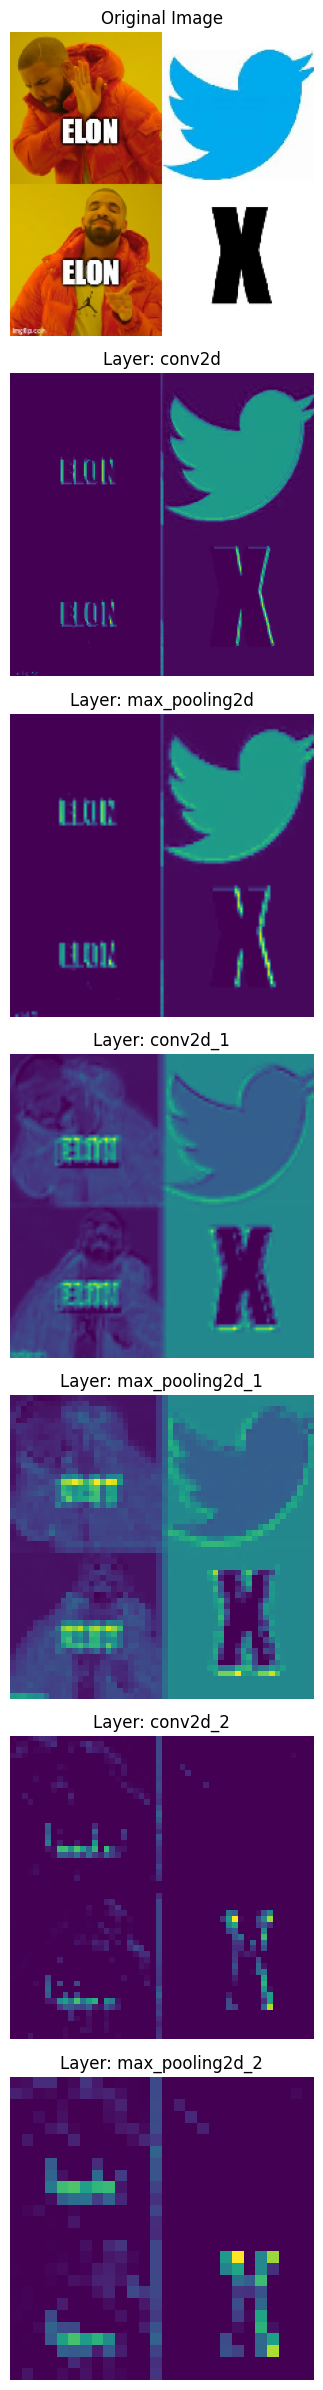

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image

# Load the sample image
# img_path = 'tokyo.jpeg'
img_path = 'drake1.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

model = tf.keras.models.load_model('meme_classification_model.h5')
# Define layers for visualization
layer_names = ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2']

# Create a model that outputs the activations of the selected layers
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=[model.get_layer(name).output for name in layer_names])

# Get the feature maps for the sample image
feature_maps = visualization_model.predict(x)

# Adjust the figure size and subplot parameters for larger subplots
plt.figure(figsize=(8, 24))  # Adjust the figure size
plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

# Plot the original image
plt.subplot(len(layer_names) + 1, 1, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Plot the feature maps for each layer
for i, feature_map in enumerate(feature_maps):
    plt.subplot(len(layer_names) + 1, 1, i + 2)
    plt.imshow(feature_map[0, :, :, 0], cmap='viridis')
    plt.title(f'Layer: {layer_names[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()